<a href="https://colab.research.google.com/github/devpatrickfranco/transfer-learning/blob/main/transfer_learning_cats_vs_dogs_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning - Cats vs Dogs



In [1]:
# Imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


## Carregando o dataset Cats vs Dogs

In [2]:
IMG_SIZE = 160
(ds_train, ds_val), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def format_example(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

ds_train = ds_train.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)
ds_val = ds_val.map(format_example).batch(32).prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.FNUPQ9_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


## Criando o modelo com MobileNetV2

In [3]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                                 include_top=False,
                                                 weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Compilando e treinando

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(ds_train, validation_data=ds_val, epochs=1)

582/582 ━━━━━━━━━━━━━━━━━━━━ 473s 802ms/step - accuracy: 0.9858 - loss: 0.0427 - val_accuracy: 0.9847 - val_loss: 0.0442


In [8]:
print(history.history)

{'accuracy': [0.984846830368042], 'loss': [0.04386346787214279], 'val_accuracy': [0.984737753868103], 'val_loss': [0.04423531889915466]}


## Avaliação do modelo

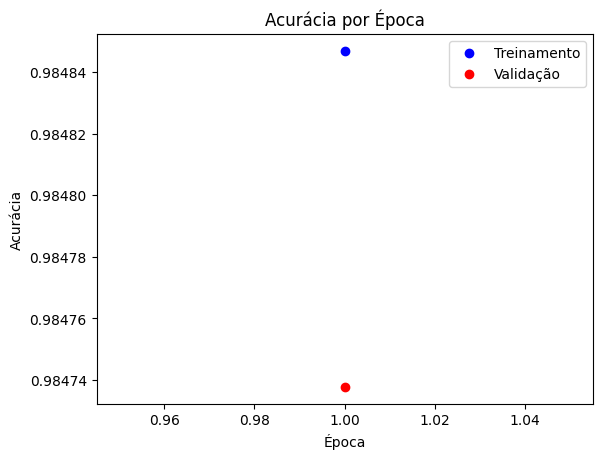

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot([1], acc, 'bo', label='Treinamento')
plt.plot([1], val_acc, 'ro', label='Validação')
plt.legend()
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.show()
